In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [40]:
from keras.preprocessing.image import ImageDataGenerator
#image augmentation Techniques
# 1. image rotation
# 2. image shifting
# 3. image scaling
# 4. image flipping
# 5. image noising
# 6. image blurring


In [41]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [43]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ML-Training/Driver Drowsiness Detection Dataset/trainset",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ML-Training/Driver Drowsiness Detection Dataset/testset",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4583 images belonging to 6 classes.
Found 1137 images belonging to 6 classes.


In [44]:
print(x_train.class_indices)

{'closed eyes': 0, 'no_yawn': 1, 'not tilting head': 2, 'open eyes': 3, 'tilting head': 4, 'yawn': 5}


In [45]:
model=Sequential()

In [46]:
#adding convolution layer ( no. of filters, filter size, input shape, activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [47]:
# adding max pooling layer (pool_size)

model.add(MaxPooling2D(pool_size=(2,2)))

In [48]:
# adding flatten layer (Input layer)
model.add(Flatten())

In [49]:
# add hidden layer(inputs=2n or n/2,weights,activation fn="relu")
model.add(Dense(units=128,activation="relu"))

In [50]:
#output layer
model.add(Dense(units=6,activation="softmax"))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               3936384   
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 3,938,054
Trainable params: 3,938,054
Non-trainable params: 0
____________________________________________

In [52]:
# Configure the learning process(Loss function, accuracy, optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [53]:
model.fit(x_train,steps_per_epoch=20,epochs=20,validation_data=x_test,validation_steps=20)

Epoch 1/20
20/20 [==============================] - 141s 7s/step - loss: 1.1606 - accuracy: 0.6047 - val_loss: 0.6155 - val_accuracy: 0.7516
Epoch 2/20
20/20 [==============================] - 123s 6s/step - loss: 0.4796 - accuracy: 0.7953 - val_loss: 0.5471 - val_accuracy: 0.7750
Epoch 3/20
20/20 [==============================] - 106s 5s/step - loss: 0.4083 - accuracy: 0.8297 - val_loss: 0.2786 - val_accuracy: 0.8750
Epoch 4/20
20/20 [==============================] - 87s 4s/step - loss: 0.3354 - accuracy: 0.8656 - val_loss: 0.2936 - val_accuracy: 0.8672
Epoch 5/20
20/20 [==============================] - 82s 4s/step - loss: 0.3032 - accuracy: 0.8875 - val_loss: 0.2336 - val_accuracy: 0.8984
Epoch 6/20
20/20 [==============================] - 61s 3s/step - loss: 0.3016 - accuracy: 0.8703 - val_loss: 0.2794 - val_accuracy: 0.8781
Epoch 7/20
20/20 [==============================] - 61s 3s/step - loss: 0.3308 - accuracy: 0.8547 - val_loss: 0.2831 - val_accuracy: 0.9000
Epoch 8/20
20/20 

In [54]:
model.save("animal.h5")

In [ ]:
## Testing

In [55]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [59]:
mymodel=load_model("animal.h5")

In [60]:
img=image.load_img("/content/drive/MyDrive/180207170148-drowsy-driving-crashes-study.jpg",target_size=(64,64))

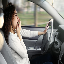

In [61]:
img

In [62]:
x=image.img_to_array(img)

In [63]:
x

array([[[ 70.,  69.,  65.],
        [ 77.,  75.,  63.],
        [ 13.,  14.,   9.],
        ...,
        [223., 222., 217.],
        [223., 222., 217.],
        [219., 219., 211.]],

       [[ 77.,  76.,  71.],
        [ 73.,  70.,  63.],
        [ 15.,  14.,  10.],
        ...,
        [219., 220., 214.],
        [221., 220., 216.],
        [220., 219., 214.]],

       [[ 88.,  85.,  80.],
        [ 80.,  77.,  72.],
        [ 18.,  17.,  13.],
        ...,
        [221., 222., 217.],
        [223., 224., 219.],
        [225., 224., 219.]],

       ...,

       [[158., 159., 163.],
        [169., 170., 174.],
        [177., 178., 182.],
        ...,
        [ 12.,  14.,  13.],
        [  6.,   6.,   6.],
        [  7.,   7.,   7.]],

       [[150., 154., 157.],
        [165., 166., 170.],
        [176., 177., 181.],
        ...,
        [ 66.,  70.,  73.],
        [  8.,  10.,   9.],
        [  5.,   7.,   6.]],

       [[142., 146., 149.],
        [154., 158., 161.],
        [170., 1

In [64]:
x.shape

(64, 64, 3)

In [65]:
x=np.expand_dims(x,axis=0)

In [66]:
x.shape


(1, 64, 64, 3)

In [67]:
x

array([[[[ 70.,  69.,  65.],
         [ 77.,  75.,  63.],
         [ 13.,  14.,   9.],
         ...,
         [223., 222., 217.],
         [223., 222., 217.],
         [219., 219., 211.]],

        [[ 77.,  76.,  71.],
         [ 73.,  70.,  63.],
         [ 15.,  14.,  10.],
         ...,
         [219., 220., 214.],
         [221., 220., 216.],
         [220., 219., 214.]],

        [[ 88.,  85.,  80.],
         [ 80.,  77.,  72.],
         [ 18.,  17.,  13.],
         ...,
         [221., 222., 217.],
         [223., 224., 219.],
         [225., 224., 219.]],

        ...,

        [[158., 159., 163.],
         [169., 170., 174.],
         [177., 178., 182.],
         ...,
         [ 12.,  14.,  13.],
         [  6.,   6.,   6.],
         [  7.,   7.,   7.]],

        [[150., 154., 157.],
         [165., 166., 170.],
         [176., 177., 181.],
         ...,
         [ 66.,  70.,  73.],
         [  8.,  10.,   9.],
         [  5.,   7.,   6.]],

        [[142., 146., 149.],
       

In [68]:
#pred=model.predict_classes(x)
y=model.predict(x)
pred=np.argmax(y,axis=1)

In [69]:
pred

array([5])

In [70]:
y

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [71]:
x_train.class_indices

{'closed eyes': 0,
 'no_yawn': 1,
 'not tilting head': 2,
 'open eyes': 3,
 'tilting head': 4,
 'yawn': 5}

In [72]:
index=['closed eyes','no_yawn','not tilting head','open eyes','tilting head','yawn']
result=str(index[pred[0]])

In [73]:
result

'yawn'